#### Captstone Final Week 2

In this notebook we look at yelp reviews to understand the # restaurants and types in our 3 target neighborhoods.  

In [38]:
import pandas as pd #import all the good stuff
import numpy as np
import os
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [39]:
df = pd.read_csv('yelp8.csv',encoding = "ISO-8859-1") # This csv contains the scraped data from yelp.  

In [40]:
df.head()

,Name,Rank,Reviews,Rating,RatingFour,Expensive,Description,Neighborhood
0,Kaliwa,234,199,3.0,Bad,2,Filipino Thai Korean,Washington DC
1,Shaws Tavern,316,537,3.0,Bad,2,Gastropubs,Shaw
2,P.J. Clarkes,360,407,3.0,Bad,2,American Traditional Burgers Bars,Downtown
3,Sticky Rice,388,1173,3.0,Bad,2,Sushi Bars Japanese Asian Fusion,H Street Corridor/Atlas District/Near Northeast
4,City Winery - Washington,443,82,3.0,Bad,2,Wine Bars American New Venues & Event Spaces,Ivy City


### Let's Check out the Neighborhood Restaurant Totals

In [41]:
df['Neighborhood'].value_counts()

Washington DC                                      133
Downtown                                            48
Dupont Circle                                       32
Logan Circle                                        25
Capitol Hill                                        24
Georgetown                                          22
Shaw                                                20
Adams Morgan                                        20
U Street Corridor                                   19
Penn Quarter                                        19
H Street Corridor/Atlas District/Near Northeast     18
Columbia Heights                                    16
Navy Yard                                           12
Chinatown                                           11
Woodley Park                                         9
Brookland                                            7
Foggy Bottom                                         7
Bloomingdale                                         7
Cleveland 

#### Creating a smaller dataframe with our target neighborhoods

In [42]:
df2=df[df['Neighborhood'].isin(['Logan Circle', 'U Street Corridor','Columbia Heights'])]

In [43]:
df2['Neighborhood'].value_counts()

Logan Circle         25
U Street Corridor    19
Columbia Heights     16
Name: Neighborhood, dtype: int64

Logan Circle has the largest # of restaurants in the top 500, Columbia Heights the least

In [44]:
df2.groupby('Neighborhood')['Rating'].value_counts()

Neighborhood       Rating
Columbia Heights   4.0        8
                   4.5        5
                   3.5        2
                   5.0        1
Logan Circle       4.0       21
                   3.5        3
                   4.5        1
U Street Corridor  4.0       12
                   3.5        4
                   4.5        3
Name: Rating, dtype: int64

Columbia Heights has the largest # of 4.5 star restaurants and the only 5 star restaurant

In [45]:
df2.groupby(['Neighborhood','Expensive'])['Rating'].value_counts()

Neighborhood       Expensive  Rating
Columbia Heights   2          4.0        7
                              4.5        4
                              3.5        2
                              5.0        1
                   3          4.0        1
                              4.5        1
Logan Circle       2          4.0       19
                              3.5        3
                   3          4.0        2
                              4.5        1
U Street Corridor  2          4.0       11
                              3.5        3
                              4.5        3
                   3          3.5        1
                              4.0        1
Name: Rating, dtype: int64

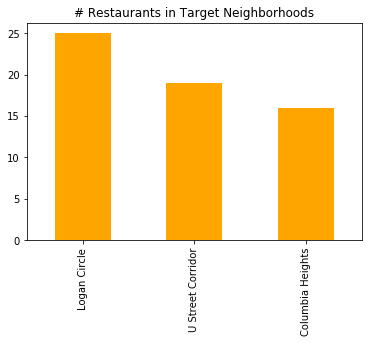

In [46]:
df2['Neighborhood'].value_counts().plot(kind='bar', color = 'orange', title = '# Restaurants in Target Neighborhoods')

pd.pivot_table(df,index=["Neighborhood","Expensive"],values=['']

In [47]:
x = df2.groupby(['Neighborhood','Rating']).size().to_frame('occurences').reset_index()

In [48]:
print(x)

        Neighborhood  Rating  occurences
0   Columbia Heights     3.5           2
1   Columbia Heights     4.0           8
2   Columbia Heights     4.5           5
3   Columbia Heights     5.0           1
4       Logan Circle     3.5           3
5       Logan Circle     4.0          21
6       Logan Circle     4.5           1
7  U Street Corridor     3.5           4
8  U Street Corridor     4.0          12
9  U Street Corridor     4.5           3


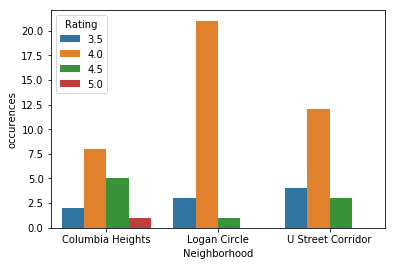

In [49]:
sns.barplot(x='Neighborhood', y='occurences', hue='Rating', data=x)

Logan Circle has a lot of average restaurants

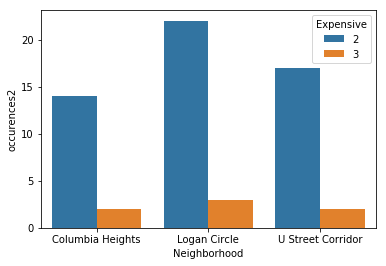

In [50]:
x2 = df2.groupby(['Neighborhood','Expensive']).size().to_frame('occurences2').reset_index()
sns.barplot(x='Neighborhood', y='occurences2', hue='Expensive', data=x2)

Logan Circle also has a lot of mid range restaurants

#### Now let's do some Modeling.  

Add more columns to the data set for decision tree

In [51]:
df.Description.str.split(expand=True).stack().value_counts()   # let's look at the frequency of words in the descriptions

Bars             178
American         170
New               93
Traditional       69
&                 68
Cocktail          48
Italian           43
Seafood           39
Breakfast         39
Brunch            39
Sushi             24
Pizza             24
Mexican           22
Asian             22
Mediterranean     21
Fusion            21
Japanese          20
Thai              19
Venues            19
Wine              17
French            17
Barbeque          16
Food              16
Spaces            15
Steakhouses       15
Event             15
Indian            15
Korean            14
Ramen             12
Southern          12
                ... 
Kong               1
Bookstores         1
Honduran           1
Smoothies          1
Restaurants        1
Georgian           1
Laotian            1
Cantonese          1
Bakeries           1
Basque             1
Pan                1
Hawaiian           1
Lankan             1
Pub                1
Poke               1
Cafe               1
Kombucha     

#### Adding in columns based on the three most frequent country descriptors:  American (assume US), Italian, Mexican

In [52]:
def a(row):
    if "American" in row['Description']:
        val = 1
    else:
        val = 0
    return val
df['Amer'] = df.apply(a, axis=1)

In [53]:
def i(row):
    if "Italian" in row['Description']:
        val = 1
    else:
        val = 0
    return val
df['Ital'] = df.apply(i, axis=1)

In [54]:
def m(row):
    if "Mexican" in row['Description']:
        val = 1
    else:
        val = 0
    return val
df['Mex'] = df.apply(m, axis=1)

In [58]:
df['lotsofreviews'] = np.where(df['Reviews']>=1000, 1, 0) # lots of reviews means that there are more than 1000 yelp reviews, 1= yes

In [56]:
df.head()

,Name,Rank,Reviews,Rating,RatingFour,Expensive,Description,Neighborhood,Amer,Ital,Mex,lotsofreviews
0,Kaliwa,234,199,3.0,Bad,2,Filipino Thai Korean,Washington DC,0,0,0,0
1,Shaws Tavern,316,537,3.0,Bad,2,Gastropubs,Shaw,0,0,0,0
2,P.J. Clarkes,360,407,3.0,Bad,2,American Traditional Burgers Bars,Downtown,1,0,0,0
3,Sticky Rice,388,1173,3.0,Bad,2,Sushi Bars Japanese Asian Fusion,H Street Corridor/Atlas District/Near Northeast,0,0,0,1
4,City Winery - Washington,443,82,3.0,Bad,2,Wine Bars American New Venues & Event Spaces,Ivy City,1,0,0,0


#### Create a decision tree to understand if we can predict a good (4 or greater) ranking from a restaurant's other data

In [60]:
X = df[['Expensive', 'Amer', 'Ital','Reviews','Mex']].values

In [61]:
y =df["RatingFour"]
y[0:5]

0    Bad
1    Bad
2    Bad
3    Bad
4    Bad
Name: RatingFour, dtype: object

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

In [64]:
ratingTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
ratingTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
ratingTree.fit(X_trainset,y_trainset) # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
predTree = ratingTree.predict(X_testset)

In [67]:
print (predTree [0:400])
print (y_testset [0:5])

['Good' 'Good' 'Good' 'Good' 'Great' 'Good' 'Good' 'Good' 'Great' 'Great'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Great' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Great' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Great' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Great' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Bad' 'Good' 'Good' 'Bad' 'Good' 'Great'
 'Good' 'Good' 'Great' 'Good' 'Good' 'Good' 'Bad' 'Great' 'Great' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Great' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Great']
130    Good
291    Good
37      Bad
239    Good
191    Good
Name: RatingFour, dtype: object


In [68]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.68


In [69]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

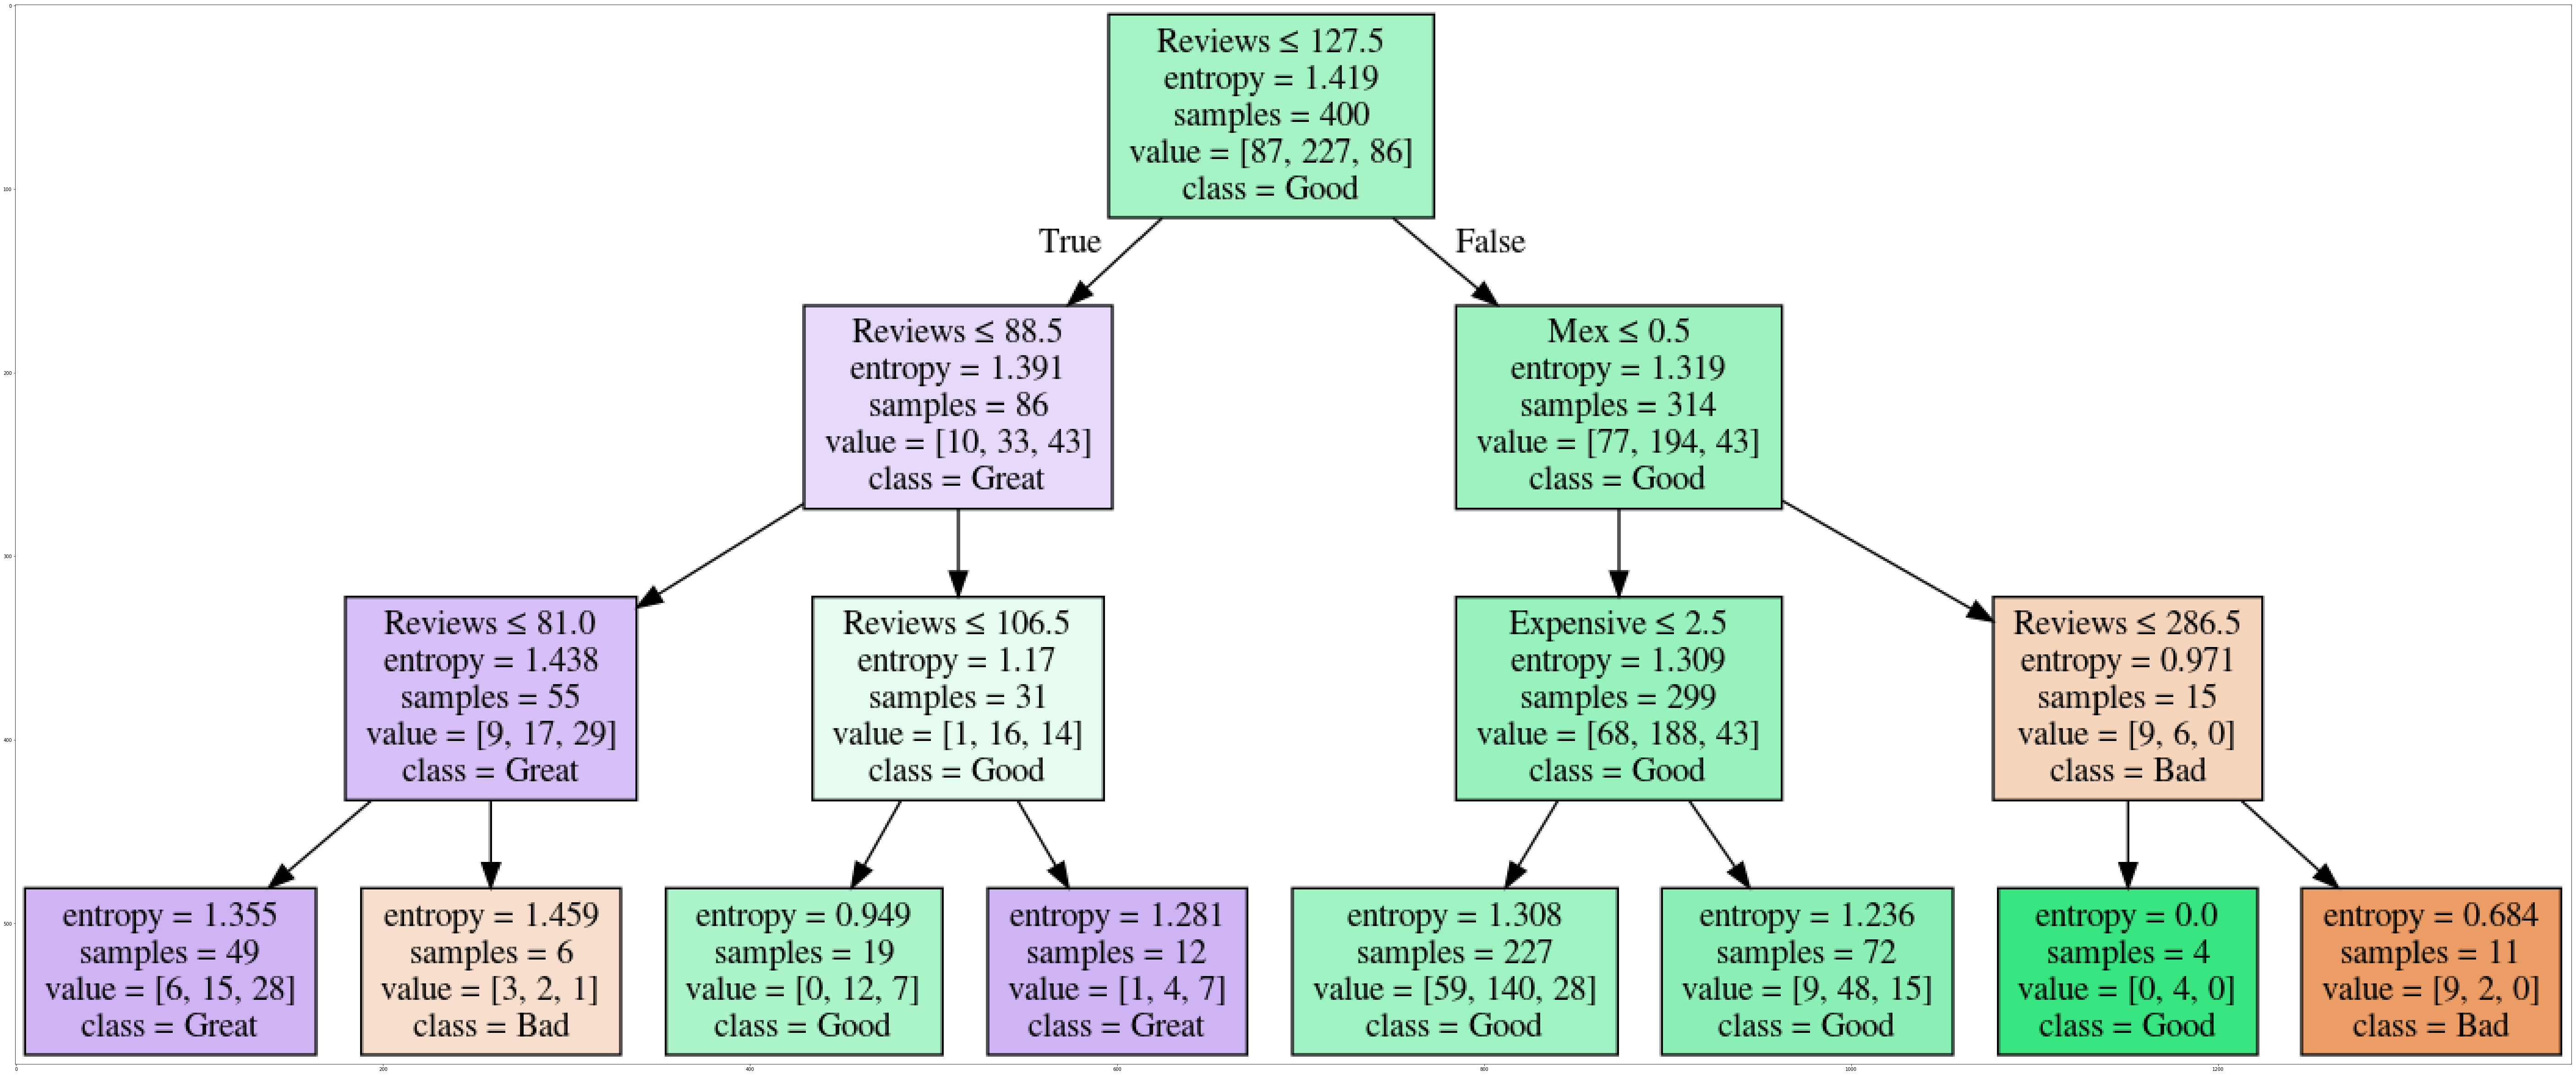

In [82]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[[5,8,9,2,10]]
targetNames = df["RatingFour"].unique().tolist()
out=tree.export_graphviz(ratingTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

The decision tree looks 'ok' but the accuracy isn't quite where we want it to be

#### Multiple linear regression on # reviews, rating and the yelp rank

In [77]:
cdf=df[['Reviews','Rating','Rank']]
cdf.head()

,Reviews,Rating,Rank
0,199,3.0,234
1,537,3.0,316
2,407,3.0,360
3,1173,3.0,388
4,82,3.0,443


In [78]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [79]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Rating','Reviews']])
y = np.asanyarray(train[['Rank']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-1.62698375e+02 -6.80992984e-02]]


In [80]:
y_hat= regr.predict(test[['Rating','Reviews']])
x = np.asanyarray(test[['Rating','Reviews']])
y = np.asanyarray(test[['Rank']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 16406.39
Variance score: 0.16


It doesn't appear that our regression fits the data very well.  Visual inspection of yelp rankings indicates that some 5 star restaurants are far down the list.